In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

<Figure size 432x288 with 0 Axes>

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='auto')

In [6]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [7]:
clf.C = 1000
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9824561403508771

In [9]:
C_range_exp = np.arange(-20., 15.)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

for C in C_range:
    clf.C = C

    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)

    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

scores = np.array(scores)
comp_time = np.array(comp_time)

1e-20 0.5877192982456141
1e-19 0.5877192982456141
1e-18 0.5877192982456141
1e-17 0.5877192982456141
1e-16 0.5877192982456141
1e-15 0.5877192982456141
1e-14 0.5877192982456141
1e-13 0.5877192982456141
1e-12 0.5877192982456141
1e-11 0.5877192982456141
1e-10 0.5877192982456141
1e-09 0.5877192982456141
1e-08 0.5877192982456141
1e-07 0.5877192982456141
1e-06 0.5877192982456141
1e-05 0.5877192982456141
0.0001 0.5877192982456141
0.001 0.5877192982456141
0.01 0.5877192982456141
0.1 0.6842105263157895
1.0 0.956140350877193
10.0 0.9649122807017544
100.0 0.9649122807017544
1000.0 0.9824561403508771
10000.0 0.9824561403508771
100000.0 0.9824561403508771
1000000.0 0.9824561403508771
10000000.0 0.9824561403508771
100000000.0 0.9824561403508771
1000000000.0 0.9824561403508771
10000000000.0 0.9824561403508771
100000000000.0 0.9824561403508771
1000000000000.0 0.9824561403508771
10000000000000.0 0.9824561403508771
100000000000000.0 0.9824561403508771


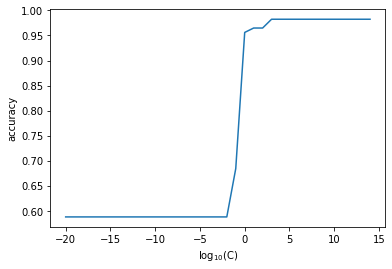

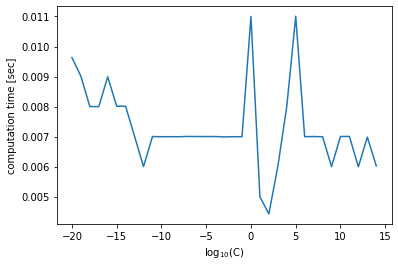

In [10]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

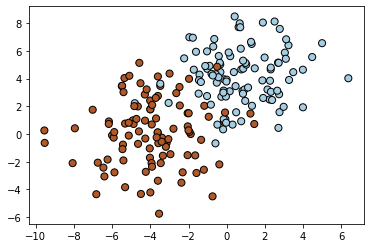

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); 

In [12]:
def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    
    # if SVM, draw margine lines
    colors = ['k']*3
    linestyles = ['-']*3
    levels = [-1, 0, 1]
    # if SVM, plot support vecters
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k')
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, zorder=-10)
    if boundary:
        plt.contour(XX, YY, Z, 
                    colors=colors,
                    linestyles=linestyles,
                    levels=levels) # draw lines (level=0:boundary, level=+-1:margine lines)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

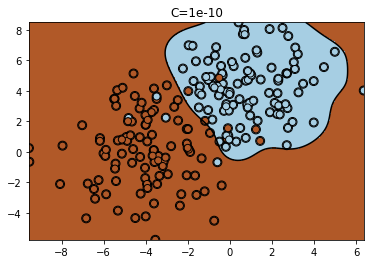

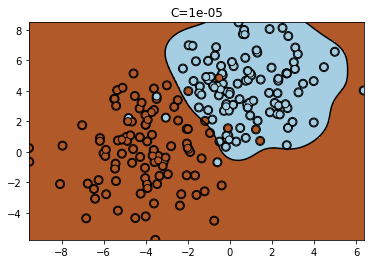

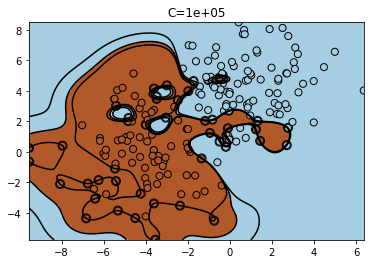

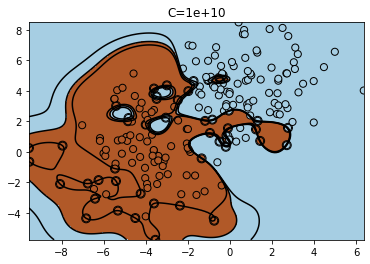

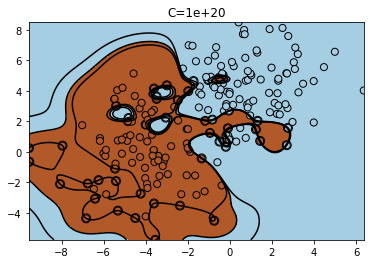

In [13]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
clf.gamma = 'auto'

for C in [1e-10, 1e-5, 1e5, 1e10, 1e20]:
    
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0],X[:, 1],marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

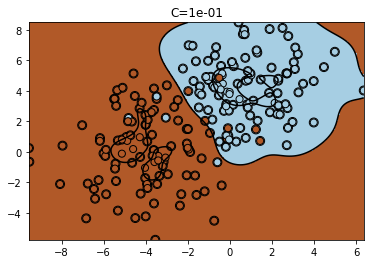

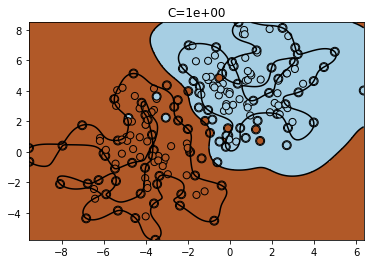

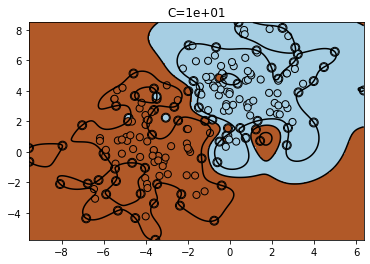

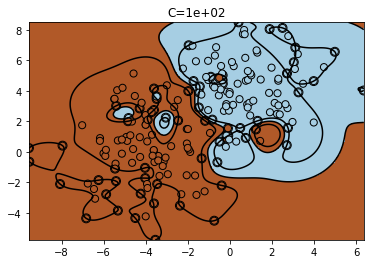

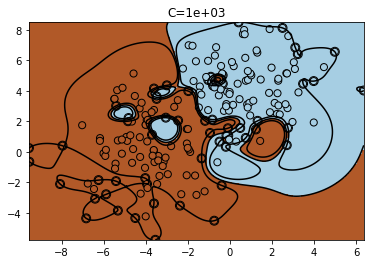

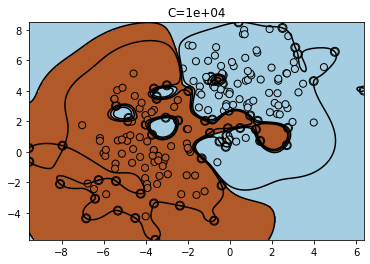

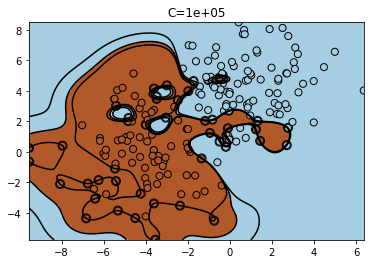

In [14]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
clf.gamma = 'auto'

for C in 10 ** np.arange(-1.0,6.0):
    
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:,0],X[:,1],marker='o',s=50,c=y,edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

(-10, 10)

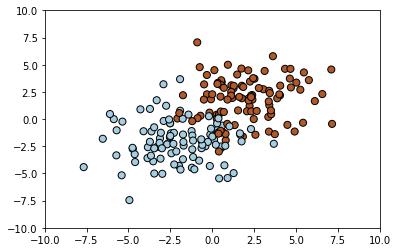

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
                  cluster_std=2, # クラスタの大きさ（標準偏差）
                  # random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
plt.xlim(-10,10)
plt.ylim(-10,10)

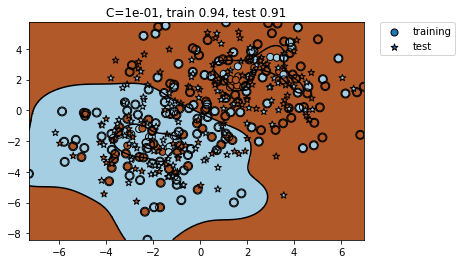

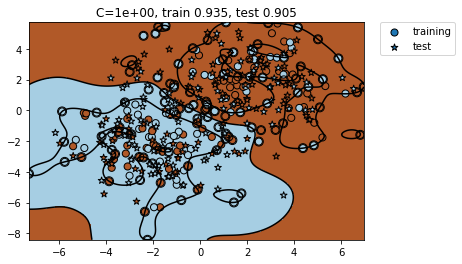

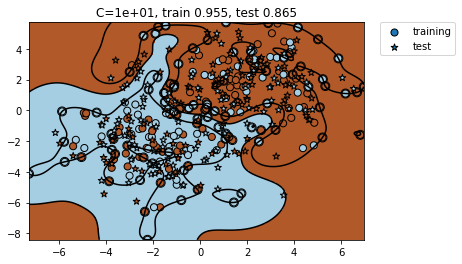

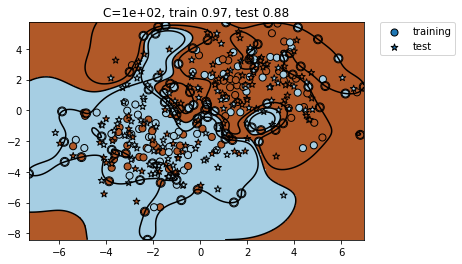

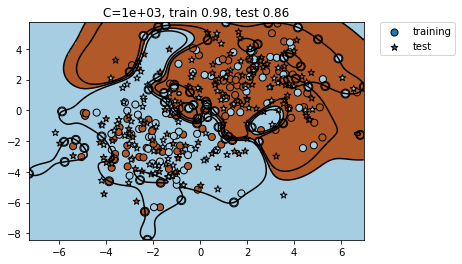

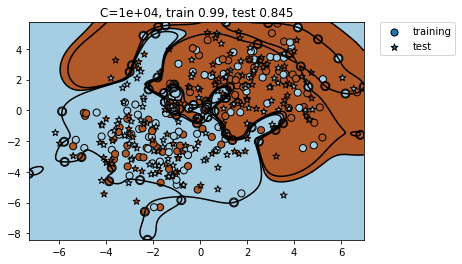

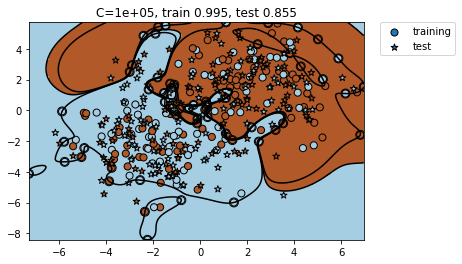

In [18]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
clf.gamma = 'auto'

X_train, y_train = make_blobs(n_samples=200, # 20個生成
              n_features=2, # 2次元
              centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
              cluster_std=2, # クラスタの大きさ（標準偏差）
              # random_state=3   # 乱数種（再現用）
             )

X_test, y_test = make_blobs(n_samples=200, # 20個生成
      n_features=2, # 2次元
      centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
      cluster_std=2, # クラスタの大きさ（標準偏差）
      # random_state=3   # 乱数種（再現用）
     )


for C in 10 ** np.arange(-1.0, 6.0):
   
    clf.C = C
    
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', s=50, c=y, label="training", edgecolors='k')

    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)

    plotSVMBoundary(X_train, clf, mesh=True)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=50, c=y, label="test", edgecolors='k')

    test_score = clf.score(X_test, y_test)
    
    plt.title("C={0:.0e}, train {1}, test {2}".format(C, train_score, test_score))

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()